### Importing required libraries

In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
import warnings
import mplfinance as mpf
import time

# Ignore all warnings
warnings.filterwarnings("ignore")

### Defining a Class ScriptData which can fetch US Stock data using Alpha Vantage.


In [2]:
class ScriptData:
    def __init__(self, api_key):
        self.ts = TimeSeries(key=api_key, output_format='pandas')

    def fetch_intraday_data(self, script):
        data, _ = self.ts.get_intraday(symbol=script, interval='1min', outputsize='full')
        return data

    def convert_intraday_data(self, script):
        data = self.fetch_intraday_data(script)
        data = data.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
        data.index = pd.to_datetime(data.index)
        return data
    
    def __getitem__(self, script):
        return self.convert_intraday_data(script)
    
    def __setitem__(self, script, value):
        raise NotImplementedError("Setting values is not supported.")
    
    def __contains__(self, script):
        try:
            self.fetch_intraday_data(script)
            return True
        except:
            return False

### Defining a function called indicator1

In [3]:
def indicator1(df, timeperiod):
    indicator = df['close'].rolling(timeperiod).mean()
    result = pd.DataFrame({'timestamp': df.index, 'indicator': indicator})
    return result

In [4]:
timeperiod = 5

### Defining a class Strategy

In [5]:
class Strategy:
    def __init__(self, api_key):
        self.script_data = ScriptData(api_key)

    def fetch_data(self, script):
        self.script_data.fetch_intraday_data(script)
        self.script_data.convert_intraday_data(script) 
        self.close_data = self.script_data[script].close  # Assign 'close' column as close_data# Pass the script argument here

    def compute_indicator(self, timeperiod):
        self.indicator_data = indicator1(self.script_data[script], timeperiod)
        ind_data = self.indicator_data
        return ind_data

    def generate_signals(self):
        signals = pd.DataFrame({'timestamp': self.script_data[script].index, 'signal': 'NO_SIGNAL'})
        indicator_data = self.indicator_data['indicator'].reset_index(drop=True)

        # Reset the index of self.close_data to match the index of indicator_data
        self.close_data.reset_index(drop=True, inplace=True)

        # Identify instances where indicator_data cuts close_data upwards
        upward_crossings = (indicator_data > self.close_data).shift(1) & (indicator_data < self.close_data)
        signals.loc[upward_crossings, 'signal'] = 'BUY'

        # Identify instances where indicator_data cuts close_data downwards
        downward_crossings = (indicator_data < self.close_data).shift(1) & (indicator_data > self.close_data)
        signals.loc[downward_crossings, 'signal'] = 'SELL'
        self.signals = signals
        
    def print_signals(self):
        filtered_signals = self.signals[(self.signals['signal'] == 'BUY') | (self.signals['signal'] == 'SELL')]
        return filtered_signals


In [6]:
api_key = 'A3ZZV03044W0TNIC'
script_data = ScriptData(api_key)

### GOOGL

In [7]:
script_data.fetch_intraday_data("GOOGL")
script_data.convert_intraday_data("GOOGL")
script_data["GOOGL"]

,open,high,low,close,volume
date,,,,,
2023-06-16 19:59:00,123.65,123.65,123.65,123.65,192.0
2023-06-16 19:58:00,123.60,123.60,123.60,123.60,377.0
2023-06-16 19:57:00,123.63,123.63,123.60,123.60,950.0
2023-06-16 19:53:00,123.71,123.71,123.70,123.70,611.0
2023-06-16 19:51:00,123.75,123.76,123.75,123.76,684.0
...,...,...,...,...,...
2023-06-05 04:50:00,124.14,124.14,124.14,124.14,490.0
2023-06-05 04:49:00,124.16,124.16,124.16,124.16,153.0
2023-06-05 04:05:00,124.09,124.09,124.09,124.09,215.0


In [8]:
df_googl = script_data["GOOGL"]

In [9]:
"GOOGL" in script_data

True

In [10]:
script = 'GOOGL'
timeperiod = 5
time.sleep(60)

In [11]:
strategy = Strategy(api_key)
strategy.fetch_data(script)  # Pass the script argument here
strategy.compute_indicator(timeperiod)
strategy.generate_signals()
strategy.print_signals()
time.sleep(60)

In [12]:
indicator_googl = strategy.compute_indicator(timeperiod)

In [13]:
signal_googl = strategy.print_signals()

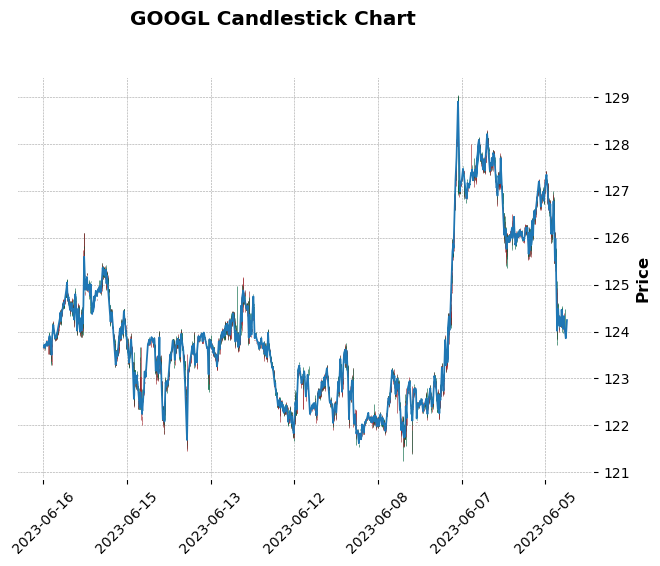

In [34]:
# Create an addplot for the indicator
indicator_plot = mpf.make_addplot(indicator_googl['indicator'])

# Plot the candlestick chart with the indicator as a line plot
mpf.plot(df_googl, type='candle', style='charles', title='GOOGL Candlestick Chart', ylabel='Price', addplot=indicator_plot,
         datetime_format='%Y-%m-%d')

### NVDA

In [15]:
script_data.fetch_intraday_data("NVDA")
script_data.convert_intraday_data("NVDA")
script_data["NVDA"]

,open,high,low,close,volume
date,,,,,
2023-06-16 19:59:00,427.6000,427.6500,427.6000,427.6200,2399.0
2023-06-16 19:58:00,427.6600,427.7000,427.6000,427.6100,3843.0
2023-06-16 19:57:00,427.6700,427.7500,427.6700,427.7500,2583.0
2023-06-16 19:55:00,427.7000,427.7000,427.7000,427.7000,336.0
2023-06-16 19:54:00,427.8800,427.8800,427.6000,427.6000,4014.0
...,...,...,...,...,...
2023-06-05 04:04:00,391.0583,391.0583,390.9583,390.9583,2085.0
2023-06-05 04:03:00,391.2682,391.2682,391.2682,391.2682,616.0
2023-06-05 04:02:00,391.1982,391.5082,391.1982,391.2582,1327.0


In [16]:
df_nvda = script_data["NVDA"]

In [17]:
"NVDA" in script_data

False

In [18]:
script = 'NVDA'
time.sleep(60)

In [19]:
strategy = Strategy(api_key)
strategy.fetch_data(script)
strategy.compute_indicator(timeperiod)
strategy.generate_signals()
strategy.print_signals()
time.sleep(60)

In [20]:
indicator_nvda = strategy.compute_indicator(timeperiod)

In [21]:
signal_nvda = strategy.print_signals()

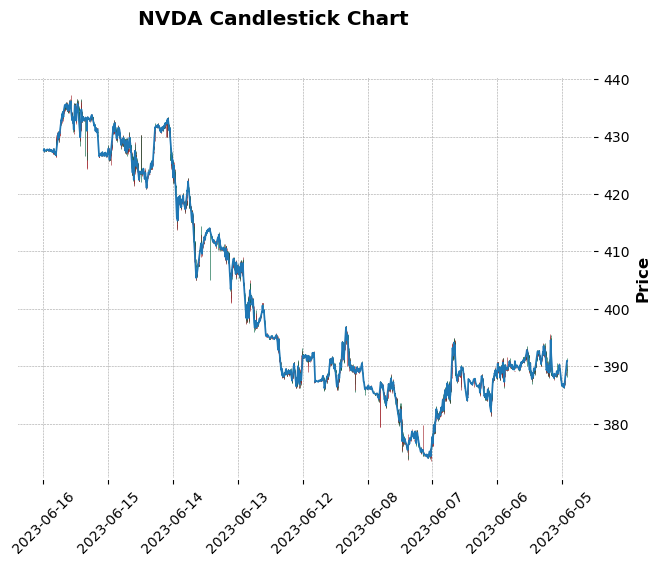

In [22]:
# Create an addplot for the indicator
indicator_plot = mpf.make_addplot(indicator_nvda['indicator'])

# Plot the candlestick chart with the indicator as a line plot
mpf.plot(df_nvda, type='candle', style='charles', title='NVDA Candlestick Chart', ylabel='Price', addplot=indicator_plot,
         datetime_format='%Y-%m-%d')

### AAPL

In [23]:
script_data.fetch_intraday_data("AAPL")
script_data.convert_intraday_data("AAPL")
script_data["AAPL"]

,open,high,low,close,volume
date,,,,,
2023-06-16 19:59:00,184.95,184.95,184.94,184.94,336.0
2023-06-16 19:58:00,184.95,184.95,184.95,184.95,273.0
2023-06-16 19:51:00,184.99,184.99,184.99,184.99,333.0
2023-06-16 19:49:00,184.99,185.00,184.99,184.99,757.0
2023-06-16 19:48:00,185.00,185.00,185.00,185.00,487.0
...,...,...,...,...,...
2023-06-05 04:04:00,181.32,181.44,181.32,181.44,1215.0
2023-06-05 04:03:00,181.24,181.32,181.24,181.32,1000.0
2023-06-05 04:02:00,181.26,181.38,181.21,181.38,1769.0


In [24]:
df_aapl = script_data["AAPL"]

In [25]:
"AAPL" in script_data

True

In [26]:
script = 'AAPL'
time.sleep(60)

In [27]:
strategy = Strategy(api_key)
strategy.fetch_data(script)
strategy.compute_indicator(timeperiod)
strategy.generate_signals()
strategy.print_signals()
time.sleep(60)

In [28]:
indicator_aapl = strategy.compute_indicator(timeperiod)

In [29]:
signal_aapl = strategy.print_signals()

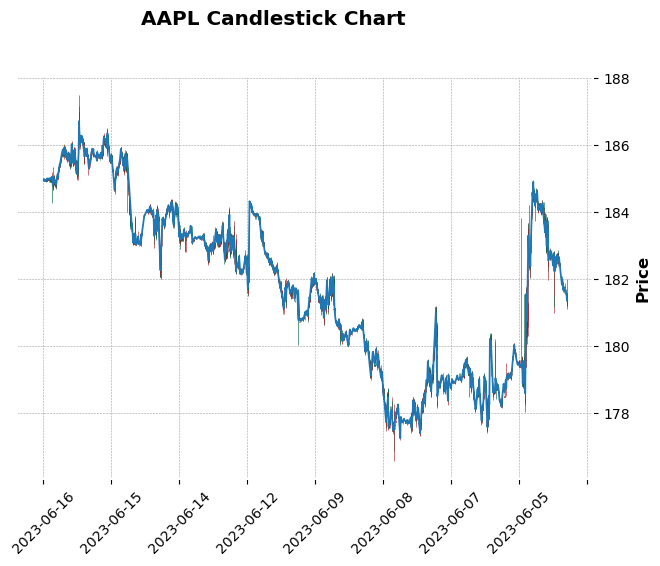

In [30]:
# Create an addplot for the indicator
indicator_plot = mpf.make_addplot(indicator_aapl['indicator'])

# Plot the candlestick chart with the indicator as a line plot
mpf.plot(df_aapl, type='candle', style='charles', title='AAPL Candlestick Chart', ylabel='Price', addplot=indicator_plot,
         datetime_format='%Y-%m-%d')  # Customize the datetime format

In [31]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.
